In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import random as rndm

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
feature = pd.read_csv('https://raw.githubusercontent.com/asarmadi/summer_ml_s3/master/day05/fish_market_feature.csv')
label = pd.read_csv('https://raw.githubusercontent.com/asarmadi/summer_ml_s3/master/day05/fish_market_label.csv')

X = feature.values
y = label.values

Xs = preprocessing.scale(X)

print(feature)

     Length1  Length2  Length3   Height   Width
0       11.7     12.4     13.5   2.4300  1.2690
1       19.0     20.7     23.2   9.3960  3.4104
2       38.0     41.0     46.5  17.6235  6.3705
3       13.2     14.3     15.2   2.8728  2.0672
4       37.3     40.0     43.5  12.3540  6.5250
..       ...      ...      ...      ...     ...
119     40.0     42.5     45.5   7.2800  4.3225
120     43.2     46.0     48.7   7.7920  4.8700
121     12.5     13.7     14.7   3.5280  1.9992
122     52.0     56.0     59.7  10.6863  6.9849
123     18.2     19.8     22.2   5.6166  3.1746

[124 rows x 5 columns]


In [ ]:
''' 
The test set will be released on Sunday night
'''
X_test = pd.read_csv('https://raw.githubusercontent.com/asarmadi/summer_ml_s3/master/day05/fish_market_test_feature.csv').values
y_test = pd.read_csv('https://raw.githubusercontent.com/asarmadi/summer_ml_s3/master/day05/fish_market_test_label.csv').values

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.66, random_state=42)


In [ ]:
# defining functions
def mse(y, yhat):
    return np.mean((y-yhat)**2)

def mae(y, yhat):
    return np.mean(np.abs(y-yhat))

def design_matrix(x, M):
    x = x.reshape(-1, 1)
    PhiX = (x, np.arange(M + 1))
    return PhiX
M = 3
regr = linear_model.Ridge(alpha=104, fit_intercept=True).fit(X_train, y_train)
print(mae(y_test, regr.predict(X_test)))


80.53471366160115


396
[12079.007887600705, 12075.404421254982, 12071.794946362108, 12068.179437296654, 12064.557868257689, 12060.930213267176, 12057.296446168464, 12053.656540624661, 12050.01047011703, 12046.358207943402, 12042.699727216492, 12039.035000862292, 12035.364001618342, 12031.686702032111, 12028.003074459208, 12024.313091061733, 12020.616723806472, 12016.91394446317, 12013.204724602734, 12009.489035595425, 12005.76684860907, 12002.038134607175, 11998.302864347108, 11994.561008378181, 11990.812537039801, 11987.057420459492, 11983.295628550979, 11979.52713101226, 11975.751897323556, 11971.96989674535, 11968.18109831636, 11964.385470851465, 11960.582982939672, 11956.773602941987, 11952.957298989297, 11949.134038980283, 11945.30379057918, 11941.466521213659, 11937.62219807256, 11933.770788103704, 11929.912258011602, 11926.04657425518, 11922.173703045473, 11918.293610343278, 11914.406261856804, 11910.511623039265, 11906.609659086498, 11902.700334934498, 11898.783615256942, 11894.859464462712, 1189

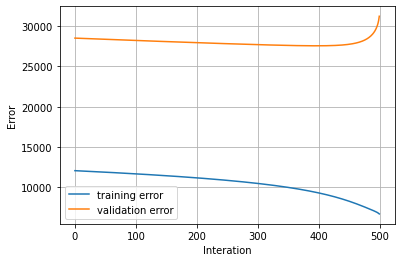

6720.109514179467
31215.309811722957


In [ ]:


training_error = []
validation_error = []
alpha_range = np.arange(500, 0, -1)

# checks for optimal alpha value
for a in alpha_range:
  regr = linear_model.Ridge(alpha=a, fit_intercept=True)
  regr.fit(X_train, y_train)

  yhat_train = regr.predict(X_train)
  MSE_train = np.mean((yhat_train - y_train)**2)
  training_error.append(MSE_train)

  yhat_val = regr.predict(X_val)
  MSE_val = np.mean((yhat_val - y_val)**2)
  validation_error.append(MSE_val)



yhat_train = regr.predict(X_train)
print(validation_error.index(min(validation_error)))
print(training_error)

#Plotting the Errors
plt.plot(training_error, label='training error')
plt.plot(validation_error, label='validation error')
plt.legend()
plt.xlabel('Interation')
plt.ylabel('Error')
plt.grid()
plt.show()
print(mse(y_train, yhat_train))
print(mse(y_val, regr.predict(X_val)))

12598.186535191246


Text(0, 0.5, 'Label')

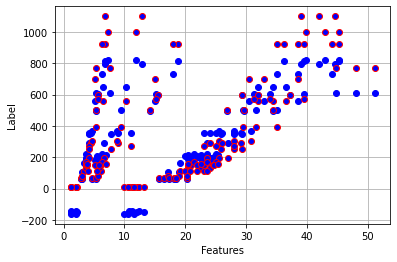

In [ ]:
print(mse(y_test, regr.predict(X_test)))
plt.plot(X_test,regr.predict(X_test),'ob',markeredgecolor='blue', label = "Prediction");
plt.plot(X_test,y_test,'ob',markeredgecolor='red', label = "Label");
plt.grid();
plt.xlabel('Features')
plt.ylabel('Label')






